# 따릉이 데이터를 활용한 데이터 분석
- 각 날짜의 1시간 전의 기상상황을 가지고 1시간 후의 따릉이 대여수를 예측해보세요.

## 1. 라이브러리 및 데이터

### 라이브러리

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### 데이터 불러오기

In [2]:
train = pd.read_csv('./data/train.csv')    # 모델 학습 파일
test = pd.read_csv('./data/test.csv')      # 모델 시험 파일
submission = pd.read_csv('./data/submission.csv')    # 답안지 파일

## 2. 탐색적 자료 분석(EDA)

### pd.DataFrame.head()
- 상위 n개 행 확인 (기본값 5)

In [3]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


- id : 날짜와 시간별 id
- hour_bef_temperature : 1시간 전 기온
- hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
- hour_bef_windspeed : 1시간 전 풍속(평균)
- hour_bef_humidity : 1시간 전 습도
- hour_bef_visibility : 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
- hour_bef_ozone : 1시간 전 오존
- hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- count : 시간에 따른 따릉이 대여 수

In [4]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [5]:
submission.head()

,id,count
0,0,97.458340
1,1,245.417466
2,2,117.647721
3,4,33.663733
4,5,139.925984


### pd.DataFrame.tail()
- 하위 n개 행 확인 (기본값 5)

In [6]:
train.tail()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0
1458,2179,17,21.1,0.0,3.1,47.0,1973.0,0.046,38.0,17.0,170.0


### pd.DataFrame.shape
- 데이터프레임 행/열 개수 확인

In [7]:
train.shape, test.shape, submission.shape

((1459, 11), (715, 10), (715, 2))

### pd.DataFrame.info()
- 데이터셋의 column별 정보

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


### pd.DataFrame.describe()
- 숫자형(int, float) column들의 기술통계량
- 기술통계량 : 해당 column을 대표할 수 있는 통계값들을 의미
- 기술통계량 종류
    - count: 해당 column에서 비어 있지 않은 값의 개수
    - mean: 평균
    - std: 표준편차
    - min: 최솟값 (이상치 포함)
    - 25%(Q1): 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
    - 50%(Q2): 중앙값 (데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
    - 75%(Q3): 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
    - max: 최댓값 (이상치 포함)

In [9]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


### pd.DataFrame.groupby()
- 집단에 대한 통계량 확인
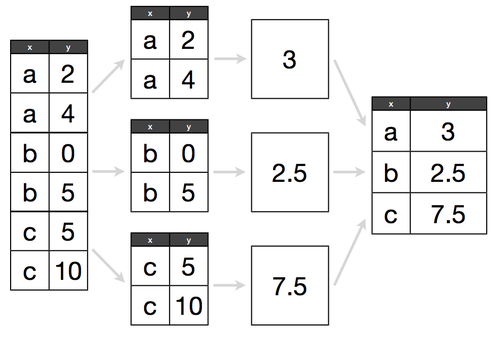

In [10]:
train[['hour', 'count']].groupby('hour').mean()

,count
hour,
0,71.766667
1,47.606557
2,31.409836
3,21.377049
4,13.524590
5,13.114754
6,24.557377
7,62.360656
8,136.688525


### plt.plot()
- 분포 시각화

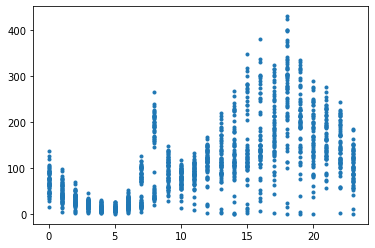

In [11]:
import matplotlib.pyplot as plt
plt.plot('hour', 'count', '.', data=train)

<AxesSubplot:xlabel='hour'>

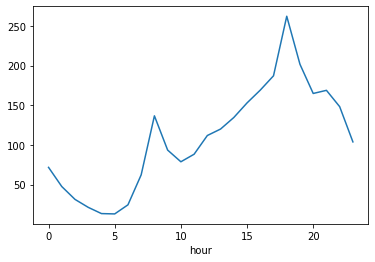

In [12]:
#train[['hour', 'count']].groupby('hour').mean().plot()
train.groupby('hour').mean()['count'].plot()

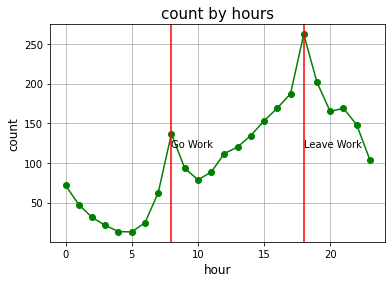

In [13]:
plt.plot(train.groupby('hour').mean()['count'], 'go-')
plt.grid()

# 그래프 제목, x축, y축 설정
plt.title('count by hours', fontsize=15)
plt.xlabel('hour', fontsize=12)
plt.ylabel('count', fontsize=12)

# 8시랑 18시 표시
plt.axvline(8, color='red')
plt.axvline(18, color='red')
plt.text(8, 120, 'Go Work', fontsize=10)
plt.text(18, 120, 'Leave Work', fontsize=10)

plt.savefig('./result/plot1.png')

### pd.DataFrame.corr()
- 상관계수 : 두 개의 변수가 같이 일어나는 강도를 나타내는 수치
- -1에서 1의 값 가짐
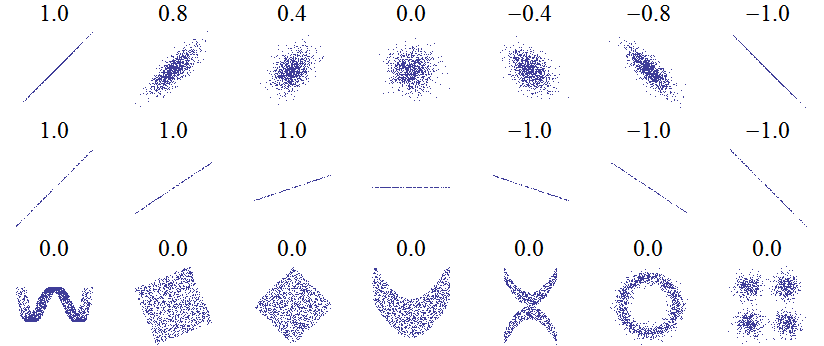

In [14]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


<AxesSubplot:>

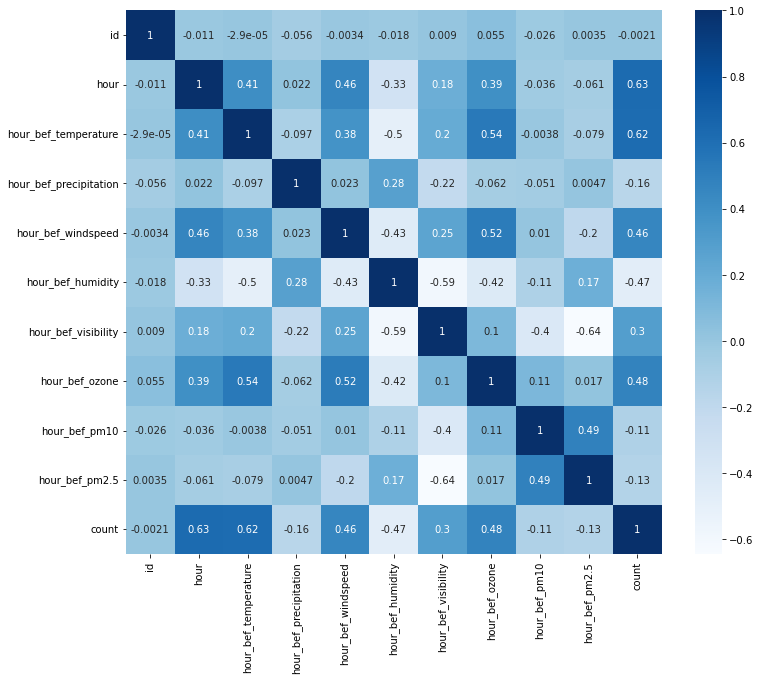

In [15]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr(), annot=True, cmap='Blues')

## 3. 데이터 전처리

### pd.Series.isna()
- 결측치 여부 확인

In [16]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

### pd.DataFrame.fillna()
- 결측치 채우기

In [17]:
# train data 결측값 평균으로 채우기
train_isna_sum = train.isna().sum()
na_columns = train_isna_sum[train_isna_sum != 0].index

In [18]:
def fill_bicycle_na(df, column):
    df[column] = df[column].fillna(value=df[column].mean())

In [19]:
for col in na_columns:
    fill_bicycle_na(train, col)
    print(col, '결측값 대체 완료')

hour_bef_temperature 결측값 대체 완료
hour_bef_precipitation 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm2.5 결측값 대체 완료


In [20]:
train.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [21]:
# test data 결측값 평균으로 채우기
test_isna_sum = test.isna().sum()
test_na_columns = test_isna_sum[test_isna_sum != 0].index

In [22]:
for col in test_na_columns:
    fill_bicycle_na(test, col)
    print(col, '결측값 대체 완료')

hour_bef_temperature 결측값 대체 완료
hour_bef_precipitation 결측값 대체 완료
hour_bef_windspeed 결측값 대체 완료
hour_bef_humidity 결측값 대체 완료
hour_bef_visibility 결측값 대체 완료
hour_bef_ozone 결측값 대체 완료
hour_bef_pm10 결측값 대체 완료
hour_bef_pm2.5 결측값 대체 완료


In [23]:
test.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

## 4. 변수 선택 및 모델 구축

In [24]:
# # count와 상관계수 높은 변수 선택
# columns = ['hour', 'hour_bef_temperature', 'hour_bef_windspeed']
# X_train = train[columns]
# y_train = train['count']
# X_test = test[columns]

In [25]:
# id, count를 제외한 모든 변수 선택
X_train = train.drop(['id', 'count'], axis=1)
y_train = train['count']
X_test = test.drop('id', axis=1)

In [26]:
X_train.shape, y_train.shape, X_test.shape

((1459, 9), (1459,), (715, 9))

### 1) KNN
- sklearn.neighbors.KNEighborsRegressor()

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [28]:
# KNN 기본 모델 생성
knn = KNeighborsRegressor(n_jobs=-1)

# KNN neighbor 개수 변화
knn_5 = KNeighborsRegressor(n_jobs=-1, n_neighbors=5)
knn_7 = KNeighborsRegressor(n_jobs=-1, n_neighbors=7)
knn_9 = KNeighborsRegressor(n_jobs=-1, n_neighbors=9)

In [29]:
# kfold 교차 검증
kfold = KFold(n_splits=5, shuffle=True, random_state=10)

In [30]:
# score 계산
knn_score = np.mean(cross_val_score(knn, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
knn_5_score = np.mean(cross_val_score(knn_5, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
knn_7_score = np.mean(cross_val_score(knn_7, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
knn_9_score = np.mean(cross_val_score(knn_9, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))

In [31]:
print('knn:', knn_score)
print('knn_5:', knn_5_score)
print('knn_7:', knn_7_score)
print('knn_9:', knn_9_score)

knn: -4116.652641999717
knn_5: -4116.652641999717
knn_7: -4096.128994905405
knn_9: -4149.337571824677


In [32]:
# knn_9 선택
knn_9.fit(X_train, y_train)

KNeighborsRegressor(n_jobs=-1, n_neighbors=9)

In [33]:
submission['count'] = knn_9.predict(X_test)
submission.to_csv('./result/knn_9.csv', index=False)

### 2) RandomForest (랜덤포레스트)
- sklearn.ensemble.RandomForestRegressor()

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
# RandomForest 기본 모델 생성
rf = RandomForestRegressor()

In [36]:
rf_score = np.mean(cross_val_score(rf, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
print('rf:', rf_score)

rf: -1535.497305903827


In [37]:
# rf 기본값 선택
rf.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
submission['count'] = rf.predict(X_test)
submission.to_csv('./result/rf.csv', index=False)

### 3) RandomForest - n_estimators 조정
- n_estimators: 생성할 tree의 개수
- n_jobs: 사용할 코어의 수 (n_jobs=-1: 컴퓨터의 모든 코어 사용)
- random_state: 랜덤하게 값 변화

In [39]:
# RandomForest tree 개수 변화
rf_100 = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=10)
rf_200 = RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=10)
rf_300 = RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=10)
rf_500 = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=10)

In [40]:
rf_100_score = np.mean(cross_val_score(rf_100, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
rf_200_score = np.mean(cross_val_score(rf_200, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
rf_300_score = np.mean(cross_val_score(rf_300, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
rf_500_score = np.mean(cross_val_score(rf_500, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))

In [41]:
print('rf_100:', rf_100_score)
print('rf_200:', rf_200_score)
print('rf_300:', rf_300_score)
print('rf_500:', rf_500_score)

rf_100: -1546.8865621858963
rf_200: -1537.2335820896296
rf_300: -1529.93820386781
rf_500: -1521.7993785402248


In [42]:
# rf_500 선택
rf_500.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=10)

In [43]:
submission['count'] = rf_500.predict(X_test)
submission.to_csv('./result/rf_500.csv', index=False)

### 4) RandomForest - min_samples_split 조정
- min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터 수

In [44]:
# RandomForest min_samples_split 변화
rf_sam_30 = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=10, min_samples_split=30)
rf_sam_50 = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=10, min_samples_split=50)
rf_sam_100 = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=10, min_samples_split=100)

In [45]:
rf_sam_30_score = np.mean(cross_val_score(rf_sam_30, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
rf_sam_50_score = np.mean(cross_val_score(rf_sam_50, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
rf_sam_100_score = np.mean(cross_val_score(rf_sam_100, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))

In [46]:
print('rf_sam_30:', rf_sam_30_score)
print('rf_sam_50:', rf_sam_50_score)
print('rf_sam_100:', rf_sam_100_score)

rf_sam_30: -1647.5599150463906
rf_sam_50: -1746.5733867422455
rf_sam_100: -2009.23405613022


In [47]:
# rf_sam_30 선택
rf_sam_30.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=30, n_estimators=500, n_jobs=-1,
                      random_state=10)

In [48]:
submission['count'] = rf_sam_30.predict(X_test)
submission.to_csv('./result/rf_500_sam_30.csv', index=False)

### 5) RandomForest - max_features 조정
- max_features: 최대로 선택할 특성의 수

In [49]:
# RandomForest max_features 변화
rf_maxf_02 = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=10, min_samples_split=30, max_features=0.2)
rf_maxf_04 = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=10, min_samples_split=30, max_features=0.4)
rf_maxf_06 = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=10, min_samples_split=30, max_features=0.6)
rf_maxf_08 = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=10, min_samples_split=30, max_features=0.8)

In [50]:
rf_maxf_02_score = np.mean(cross_val_score(rf_maxf_02, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
rf_maxf_04_score = np.mean(cross_val_score(rf_maxf_04, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
rf_maxf_06_score = np.mean(cross_val_score(rf_maxf_06, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
rf_maxf_08_score = np.mean(cross_val_score(rf_maxf_08, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))

In [51]:
print('rf_maxf_02:', rf_maxf_02_score)
print('rf_maxf_04:', rf_maxf_04_score)
print('rf_maxf_06:', rf_maxf_06_score)
print('rf_maxf_08:', rf_maxf_08_score)

rf_maxf_02: -2253.430187736337
rf_maxf_04: -1830.923118087825
rf_maxf_06: -1714.0867530230257
rf_maxf_08: -1673.787363204249


In [52]:
#rf_maxf_08 선택
rf_maxf_08.fit(X_train, y_train)

RandomForestRegressor(max_features=0.8, min_samples_split=30, n_estimators=500,
                      n_jobs=-1, random_state=10)

In [53]:
submission['count'] = rf_maxf_08.predict(X_test)
submission.to_csv('./result/rf_500_sam_30_maxf_08.csv', index=False)

### 6) RandomForest - RandomizedSearchCV
- RandomizedSearchCV: 튜닝하고 싶은 파라미터 값의 범위를 정하고, n_iter 값을 지정하여 해당 수만큼 random하게 조합하여 반복하는 과정을 거쳐 최적의 파라미터 찾음

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
param = {'min_samples_split': range(30, 70),
        'max_depth': [5, 6, 7],
        'n_estimators': range(50, 250)}

In [56]:
rs = RandomizedSearchCV(estimator=rf, param_distributions=param, n_iter=30, random_state=0, scoring='neg_mean_squared_error', n_jobs=-1)

In [57]:
rs_score = np.mean(cross_val_score(rs, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
print('rs:', rs_score)

rs: -1704.6815877226104


In [58]:
# rs 선택
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [5, 6, 7],
                                        'min_samples_split': range(30, 70),
                                        'n_estimators': range(50, 250)},
                   random_state=0, scoring='neg_mean_squared_error')

In [59]:
# 최적의 파라미터 확인
rs.best_params_

{'n_estimators': 171, 'min_samples_split': 34, 'max_depth': 7}

In [60]:
submission['count'] = rs.predict(X_test)
submission.to_csv('./result/rs.csv', index=False)

### 7) RandomForest - GridSearchCV
- GridSearchCV: RandomSearchCV와 흡사한데 파라미터 범위 내 random selection이 아니라 범위 전체에 대한 모든 조합을 진행하여 최적의 파라미터 찾음

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
param = {'min_samples_split': [30, 50, 70],
        'max_depth': [5, 6, 7],
        'n_estimators': [50, 150, 250]}

In [63]:
gs = GridSearchCV(estimator=rf, param_grid=param, scoring='neg_mean_squared_error', cv=3)

In [64]:
gs_score = np.mean(cross_val_score(gs, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error'))
print('gs:', gs_score)

gs: -1688.8260646306062


In [65]:
# gs 선택
gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [30, 50, 70],
                         'n_estimators': [50, 150, 250]},
             scoring='neg_mean_squared_error')

In [66]:
# 최적의 파라미터 확인
gs.best_params_

{'max_depth': 7, 'min_samples_split': 30, 'n_estimators': 250}

In [67]:
submission['count'] = gs.predict(X_test)
submission.to_csv('./result/gs.csv', index=False)

## 5. 모델 최종 검증

In [68]:
model_dict = {'KNN': knn_9, 'RandomForest': rf, 'RF_500': rf_500, 'RF_500_30': rf_sam_30, 
              'RF_500_30_08': rf_maxf_08, 'RS': rs, 'GS': gs}

In [69]:
score = {}
for model_name in model_dict.keys():
    model = model_dict[model_name]
    score[model_name] = np.mean(cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', n_jobs=-1, cv=kfold))
    print(f'{model_name} 평가 완료')

KNN 평가 완료
RandomForest 평가 완료
RF_500 평가 완료
RF_500_30 평가 완료
RF_500_30_08 평가 완료
RS 평가 완료
GS 평가 완료


In [70]:
score

{'KNN': -4149.337571824677,
 'RandomForest': -1537.455370227369,
 'RF_500': -1521.7993785402248,
 'RF_500_30': -1647.5599150463906,
 'RF_500_30_08': -1673.787363204249,
 'RS': -1714.480906631535,
 'GS': -1696.7129958297314}

In [71]:
score_df = pd.DataFrame.from_dict(score, orient='index')
score_df

,0
KNN,-4149.337572
RandomForest,-1537.455370
RF_500,-1521.799379
RF_500_30,-1647.559915
RF_500_30_08,-1673.787363
RS,-1714.480907
GS,-1696.712996


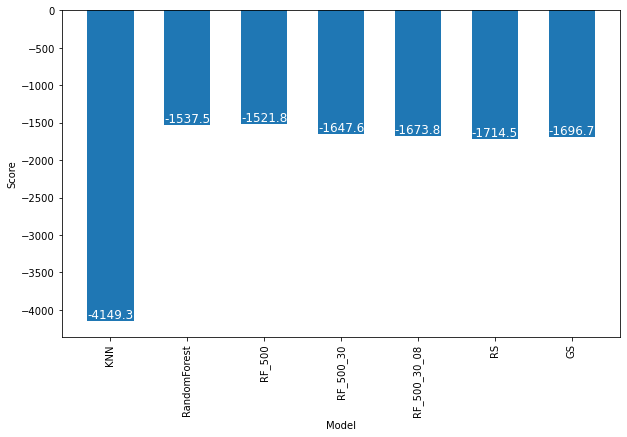

In [72]:
xs = score_df.index.to_list()
ys = score_df[0].to_list()

plt.figure(figsize=(10, 6))
plt.xlabel('Model')
plt.ylabel('Score')
bar = plt.bar(xs, ys, width=0.6)
plt.xticks(rotation=90)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size=12, color='w')
plt.show()    

## 6. 최종 결과

- RF_500 이 가장 점수 높음
- RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=10)

In [76]:
final_model = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=10)
final_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=10)

In [77]:
submission['count'] = final_model.predict(X_test)
submission.to_csv('./data/submission.csv', index=False)

In [75]:
# End of File